# R Graphics

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options.orig <- options(repr.plot.width=6, repr.plot.height=4)

## Simulate some data for plotting

In [3]:
n <- 100
x <- sort(runif(n))
y <- x^2 + x + 3 + 0.2*rnorm(n)
z <- x^2
g <- as.factor(sample(1:4, n, replace=T))
df <- tibble(x=x, y=y, z=z, g=g)

## Grammar of Graphics

`ggplot2` uses a Grammar of Graphics convention to define plots. See [The fundamentals of `gggplot2` explained](https://www.aridhia.com/technical-tutorials/the-fundamentals-of-ggplot-explained/) for a simple epxlanation.

The main concents are

- **data source**
- **map** data elements to visual characteristics (aes)
- **type of visual elements** in plot (geom)
- **layers** (+)
- **facet** to automatically show "group by" plots
- **scale** to controls how the mapping is made
- **statistics** to add summary data to the plot
- **themes** to define the look and feel of the plot



In [4]:
g0 <- ggplot(df, aes(x=x, y=y)) 

g1 <- g0 +
geom_point(aes(col=z)) +
geom_smooth(method='lm', 
            formula=y ~ poly(x, 2, raw=TRUE))

g2 <- g1 + 
labs(title="ggplot2", 
     subtitle="Graphics example",
     caption="HTS 2018",
     x="x-coordinate",
     y="y-coordiante")

g3 <- g2 +
guides(col=FALSE)

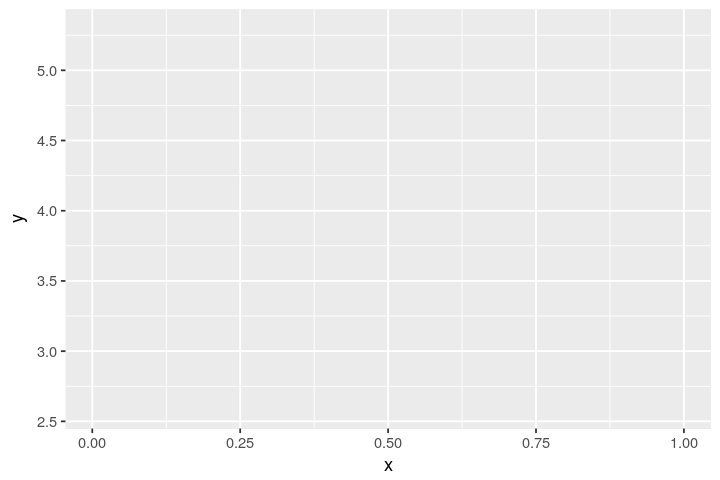

In [5]:
g0

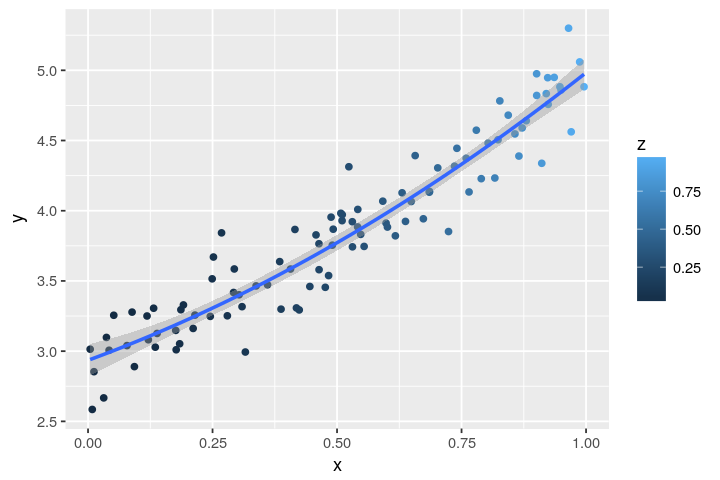

In [6]:
g1

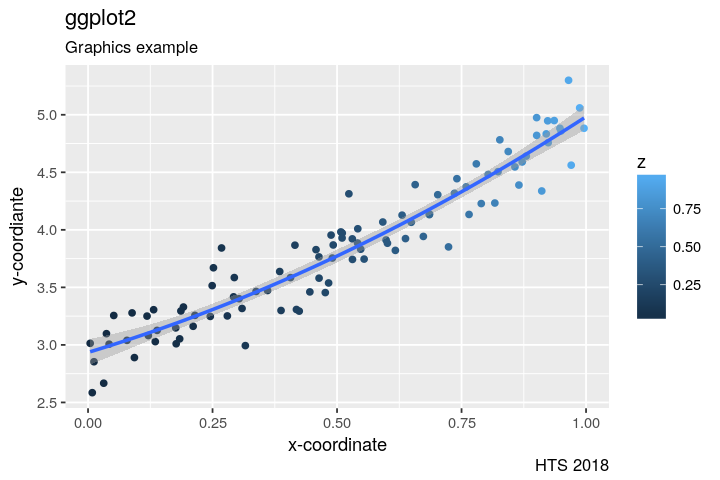

In [7]:
g2

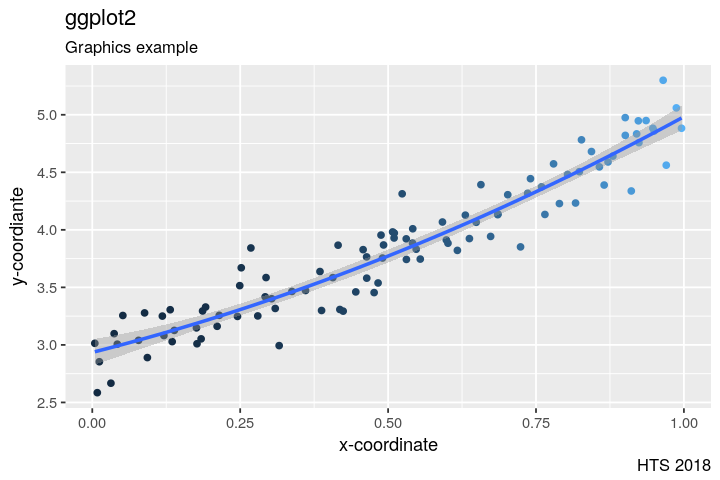

In [8]:
g3

### Interpration

- What is the data source?
- What mappings are applid to the plot as a whole? To the points?
- What labels are specified and where do they appear?
- Wthat geometric objects are used for plotitng?
- What statistics are added to the plot?
- How was layering used to build the plot incrementally?
- How were partially completed plot stages saved?

### Themes

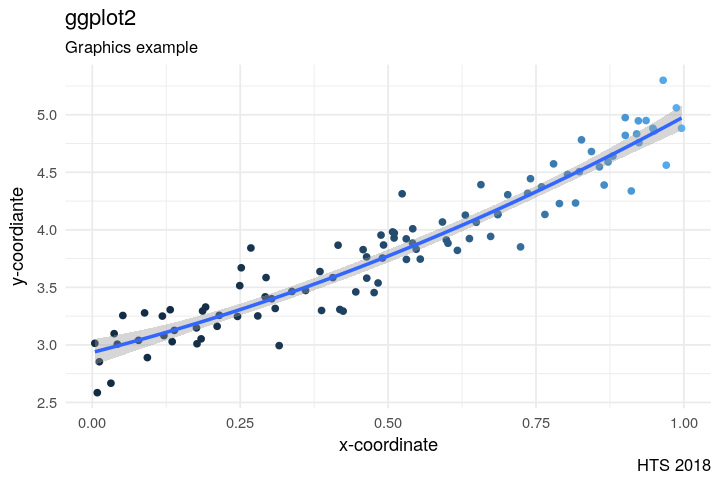

In [9]:
g3 + theme_minimal()

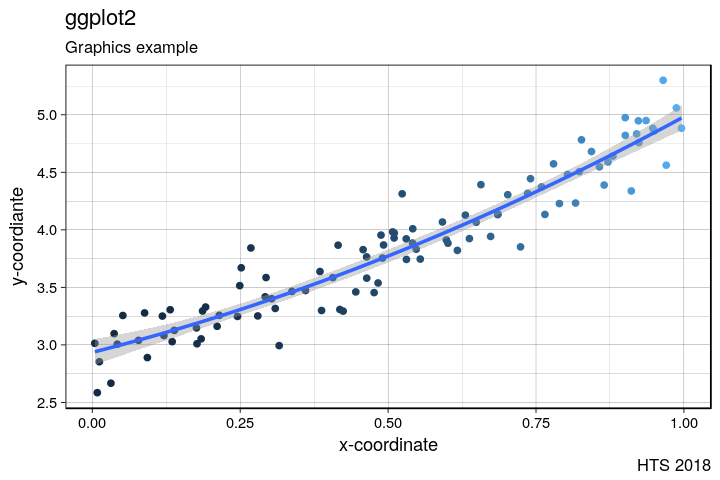

In [10]:
g3 + theme_linedraw()

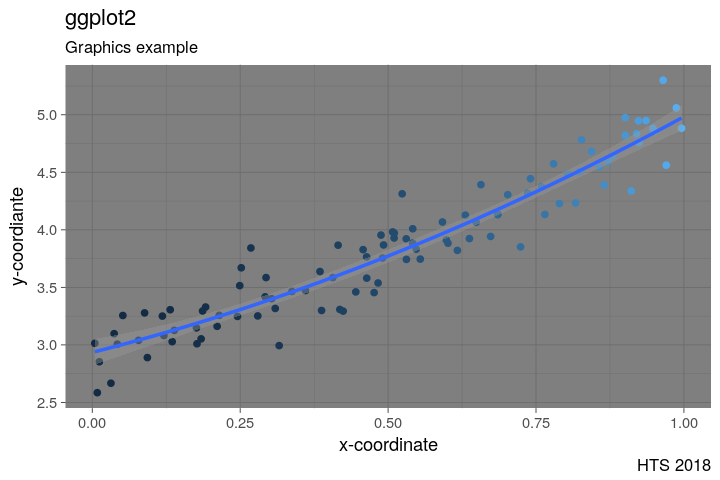

In [11]:
g3 + theme_dark()

### Facets

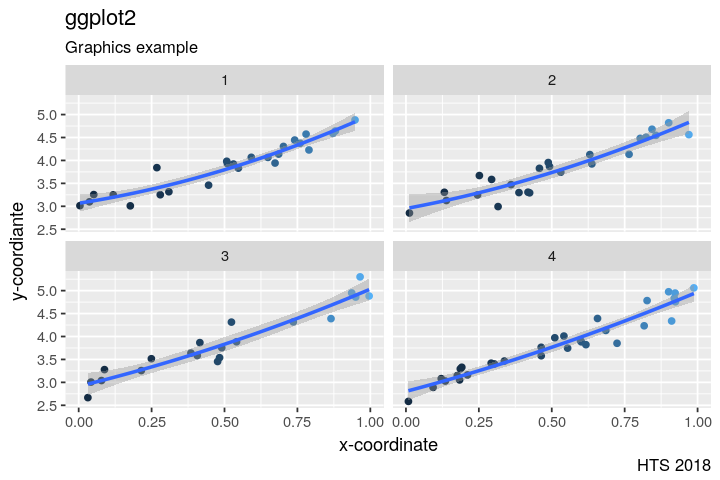

In [12]:
g3 + facet_wrap(facets='g', nrow = 2)

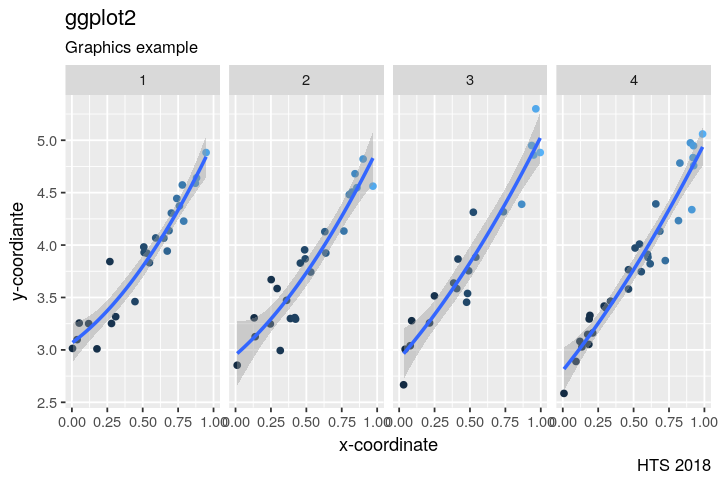

In [13]:
g3 + facet_grid(~ g)

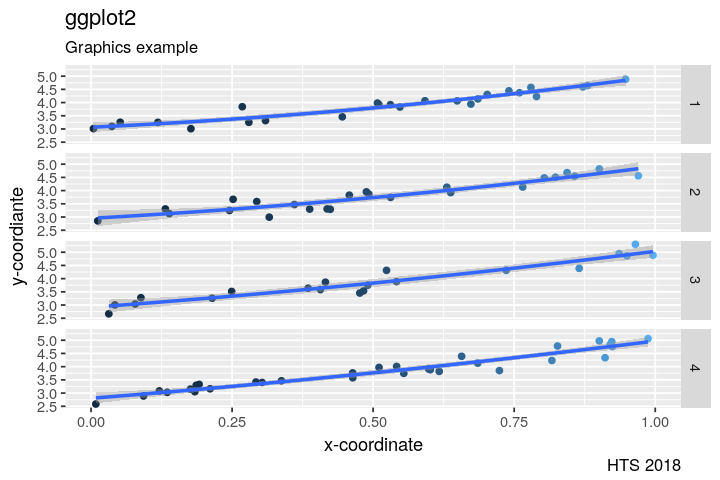

In [14]:
g3 + facet_grid(g ~ .)

### Scales

In [15]:
g4 <- ggplot(df, aes(x=x, y=y, col=as.factor(g)) ) +
geom_point() +
geom_smooth(method='lm', 
            formula=y ~ poly(x, 2, raw=TRUE)) +
labs(title="ggplot2", 
     subtitle="Graphics example",
     caption="HTS 2018",
     x="x-coordinate",
     y="y-coordiante") +
facet_grid(~ g) +
guides(col=FALSE)

#### Colors

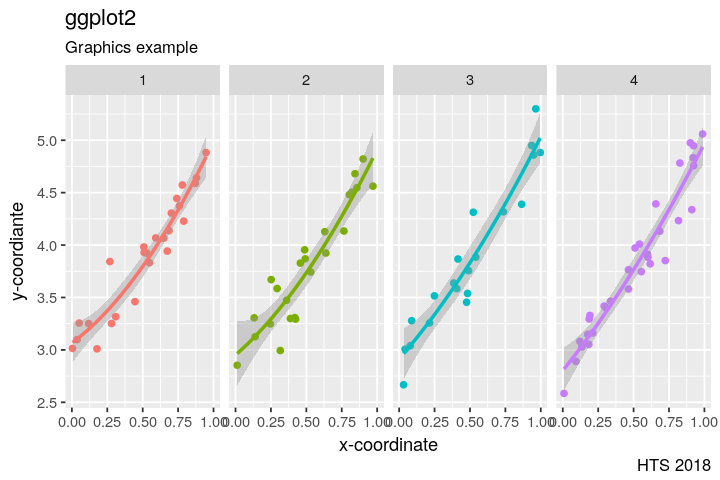

In [16]:
g4

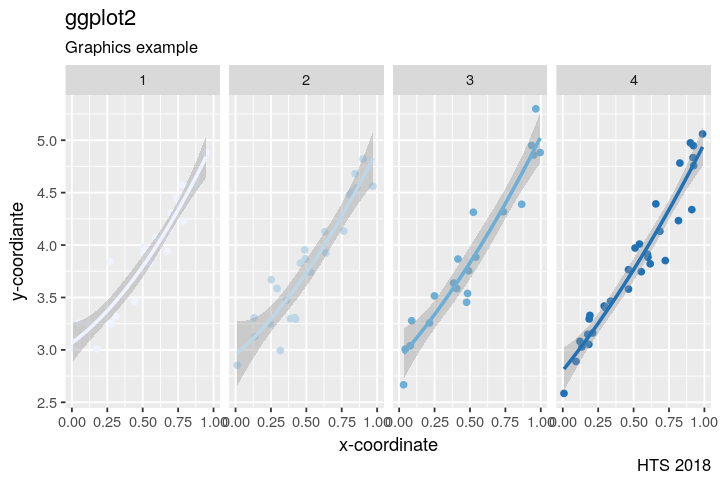

In [17]:
g4 + scale_color_brewer()

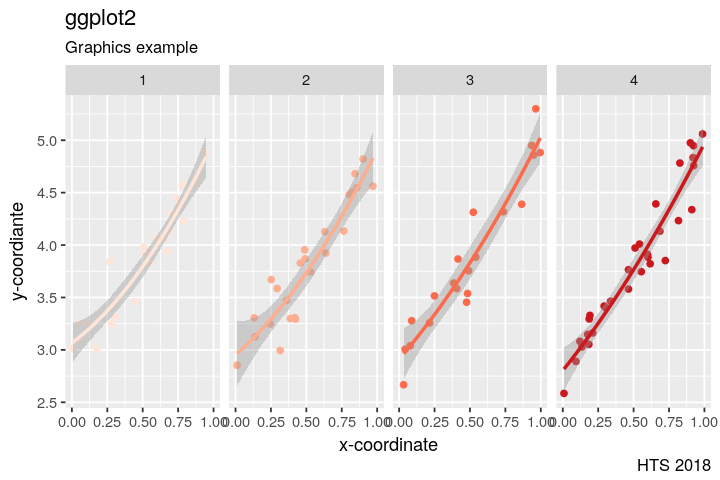

In [18]:
g4 + scale_color_brewer(type = 'seq', palette = 'Reds')

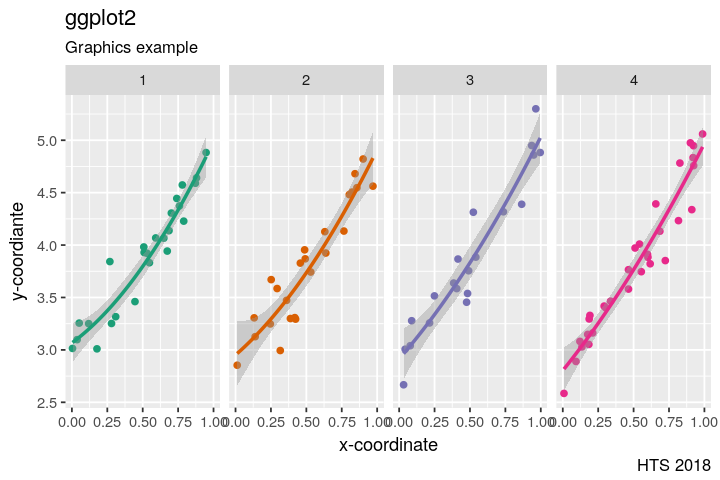

In [19]:
g4 + scale_color_brewer(type = 'qual', palette = 2)

#### Palettes available from `brewer`

The 3 plots show color maps that are

1. Sequential
2. Qualitiative
3. Divergent

In [20]:
library(RColorBrewer)

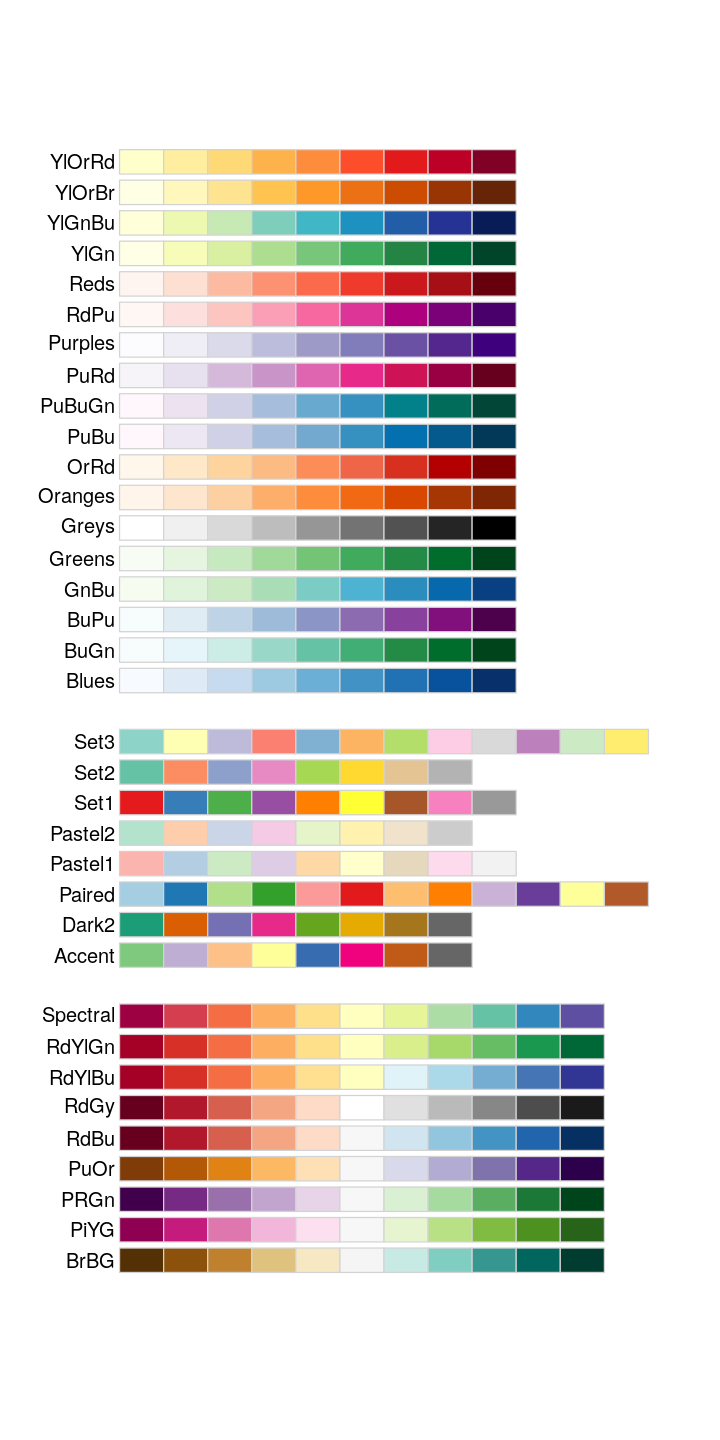

In [21]:
options.orig <- options(repr.plot.width=6, repr.plot.height=12)
display.brewer.all() 

In [22]:
options.orig <- options(repr.plot.width=6, repr.plot.height=4)

#### Scales can be used for changing the mapping of `color`, `fill`, `hue`, `size`, `coordinates` ...

Here we scale the y-coordinate to show log values.

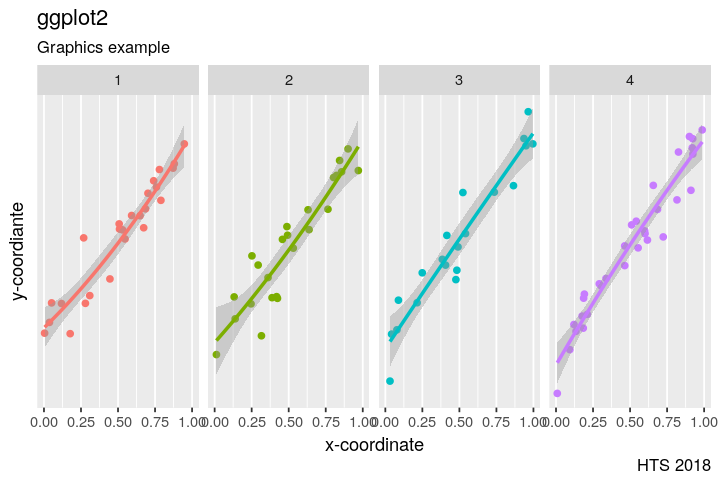

In [23]:
g4 + scale_y_log10()

### Geoms

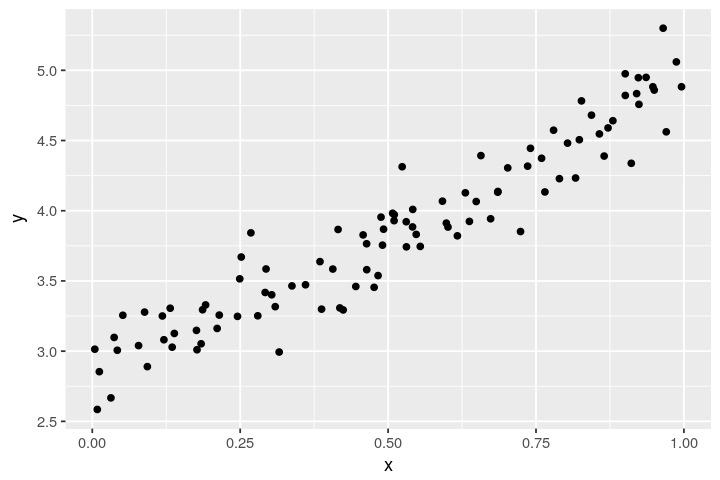

In [24]:
g0 + geom_point()

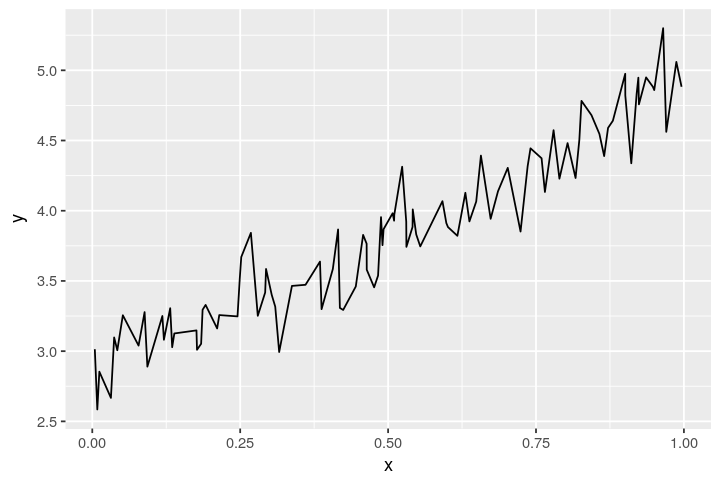

In [25]:
g0 + geom_line()

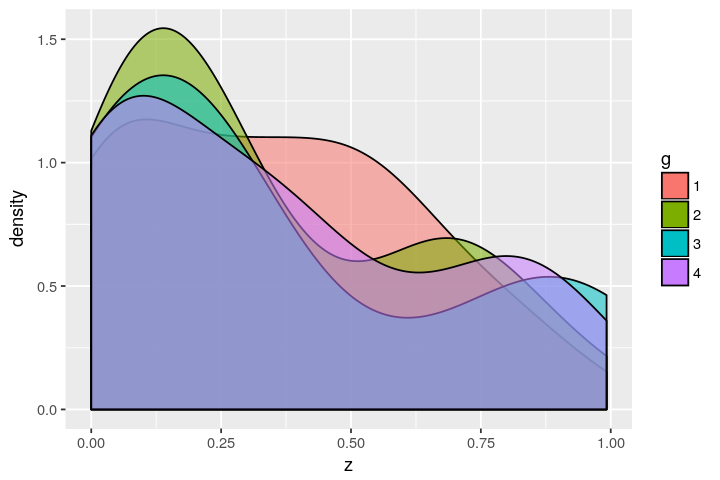

In [26]:
ggplot(df, aes(x=z, fill=g)) + 
geom_density(aes(alpha=0.1)) +
guides(alpha=F)

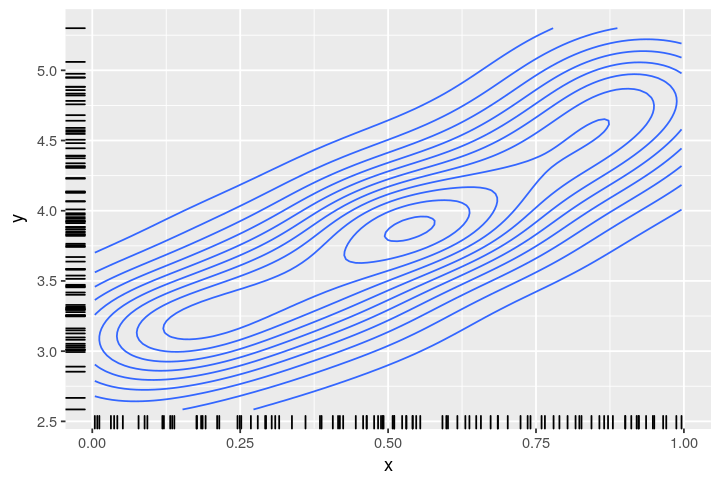

In [27]:
g0 + 
geom_density_2d() + 
geom_rug()

In [28]:
head(df)

x,y,z,g
0.004293157,3.013839,1.843120e-05,1
0.008484842,2.584769,7.199254e-05,4
0.011955994,2.853660,1.429458e-04,2
0.031500574,2.667081,9.922861e-04,3
0.036965139,3.097624,1.366421e-03,1
0.042308528,3.006366,1.790012e-03,3


#### `geom_bar` shows counts by default

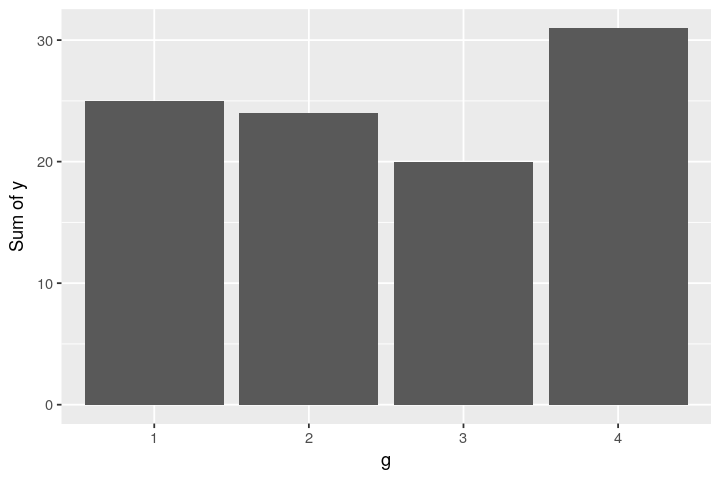

In [29]:
ggplot(df, aes(x=g)) + 
geom_bar() +
labs(y="Sum of y") 

#### Specify `weight` parameter to sum over a column by group

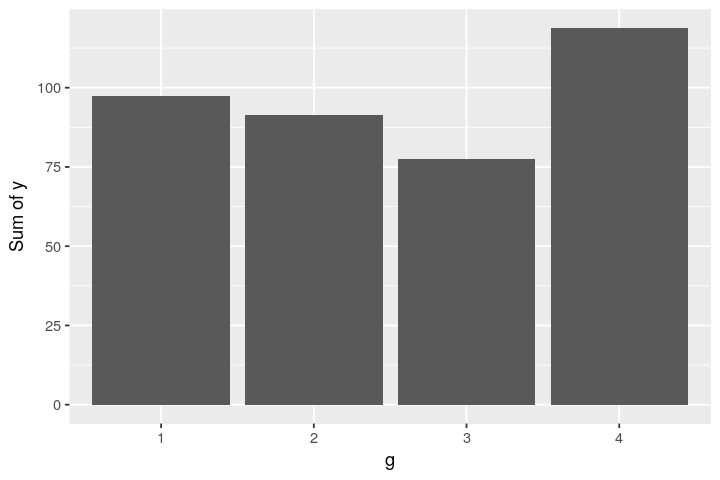

In [30]:
ggplot(df, aes(x=g, weight=y) )+ 
geom_bar() +
labs(y="Sum of y") 

#### If you already have counts, specify `stat=identity`

In [31]:
df_ <- tibble(x=c('A', 'B', 'C'), y=c(10, 14, 18))

In [32]:
head(df_)

x,y
A,10
B,14
C,18


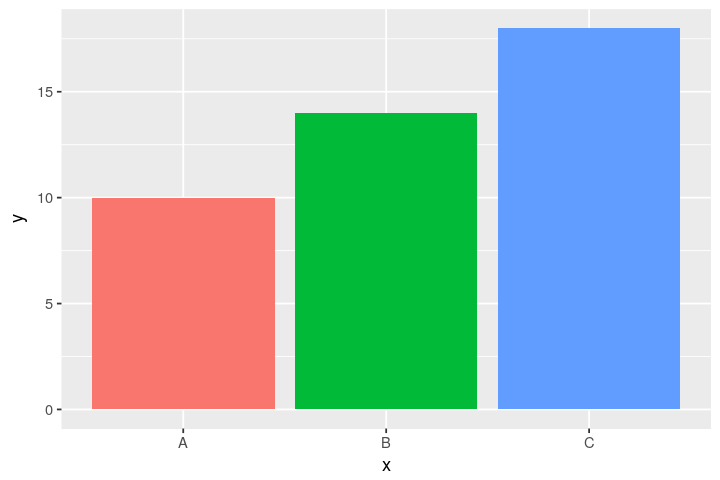

In [33]:
ggplot(df_, aes(x=x, y=y, fill=x)) + 
geom_bar(stat='identity') + 
guides(fill=F)

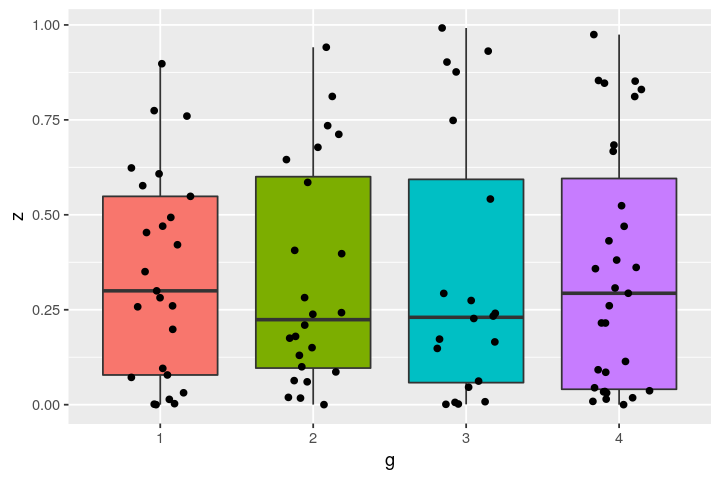

In [34]:
ggplot(df, aes(x=g, y=z, fill=g)) + 
geom_boxplot() +
geom_jitter(width=0.2)  + 
guides(fill=FALSE)

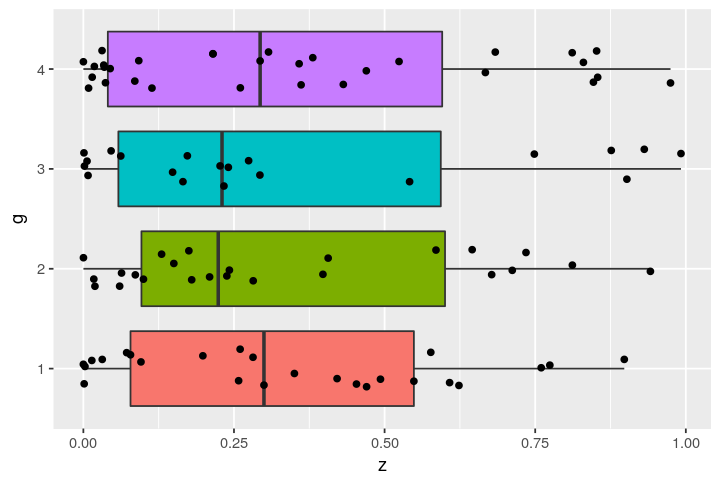

In [35]:
ggplot(df, aes(x=g, y=z, fill=g)) + 
geom_boxplot() +
geom_jitter(width=0.2) +
coord_flip() +
guides(fill=FALSE)

## Saving plots

In [36]:
ggsave('figs/box.png')

Saving 6.67 x 6.67 in image


In [37]:
ggsave('figs/g3.pdf', g3)

Saving 6.67 x 6.67 in image


### Retrieve saved files

<img src="figs/box.png" alt="drawing" width="200px"/>

<img src="figs/g3.pdf" alt="drawing" width="200px"/>